# Using pseudotime (DPT) to check the gene expression dynamics

- sample: TDR119 (15 somites)

- Last updated: 11/8/2023
- Author: Yang-Joon Kim

- We will use the CellOracle's default pseudotime result (Diffusion-based Pseudotime) to visualize the gene expression dynamics for the set of genes detected by network motifs.

- motif 38 (Feed-Forward Loop) - can be split into coherent and incoherent
- motif 46 (positive Feedback Loop)

In [1]:
import time
import os
import shutil
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
from tqdm.auto import tqdm

In [2]:
import celloracle as co
from celloracle.applications import Pseudotime_calculator
co.__version__

/home/yang-joon.kim/.conda/envs/celloracle_env/lib/python3.8/site-packages/loompy/bus_file.py:68: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def twobit_to_dna(twobit: int, size: int) -> str:
/home/yang-joon.kim/.conda/envs/celloracle_env/lib/python3.8/site-packages/loompy/bus_file.py:85: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def dna_to_twobit(dna: str

'0.14.0'

In [3]:
oracle_TDR119 = co.load_hdf5("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/TDR119_cicero_output/10_TDR119_pseudotime.celloracle.oracle")
oracle_TDR119

Oracle object

Meta data
    celloracle version used for instantiation: 0.14.0
    n_cells: 13022
    n_genes: 3000
    cluster_name: global_annotation
    dimensional_reduction_name: X_umap.joint
    n_target_genes_in_TFdict: 12674 genes
    n_regulatory_in_TFdict: 872 genes
    n_regulatory_in_both_TFdict_and_scRNA-seq: 318 genes
    n_target_genes_both_TFdict_and_scRNA-seq: 1637 genes
    k_for_knn_imputation: 325
Status
    Gene expression matrix: Ready
    BaseGRN: Ready
    PCA calculation: Done
    Knn imputation: Done
    GRN calculation for simulation: Not finished

In [5]:
oracle_TDR119.adata.obs["Pseudotime_Lineage_Meso"].head()

AAACAGCCACCTAAGC-1         NaN
AAACAGCCAGGGAGGA-1    0.159441
AAACAGCCATAGACCC-1    0.105814
AAACATGCAAACTCAT-1         NaN
AAACATGCAAGGACCA-1         NaN
Name: Pseudotime_Lineage_Meso, dtype: float64

In [7]:
oracle_TDR119.adata.obs["Pseudotime_Lineage_Meso"].head()

AAACAGCCACCTAAGC-1         NaN
AAACAGCCAGGGAGGA-1    0.159441
AAACAGCCATAGACCC-1    0.105814
AAACATGCAAACTCAT-1         NaN
AAACATGCAAGGACCA-1         NaN
Name: Pseudotime_Lineage_Meso, dtype: float64

In [8]:
oracle_TDR119.adata.obs["Lineage_Meso"]

AAACAGCCACCTAAGC-1    False
AAACAGCCAGGGAGGA-1     True
AAACAGCCATAGACCC-1     True
AAACATGCAAACTCAT-1    False
AAACATGCAAGGACCA-1    False
                      ...  
TTTGTTGGTCGACTCC-1    False
TTTGTTGGTGATTTGG-1    False
TTTGTTGGTTCACCCA-1    False
TTTGTTGGTTCGGGAT-1    False
TTTGTTGGTTTGTGGA-1     True
Name: Lineage_Meso, Length: 13022, dtype: category
Categories (2, object): ['False', 'True']

In [9]:
adata_lineage_meso = oracle_TDR119.adata[oracle_TDR119.adata.obs["Lineage_Meso"]=="True"]
adata_lineage_meso

View of AnnData object with n_obs × n_vars = 3359 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'nCount_SCT', 'nFeature_SCT', 'global_annotation', 'nCount_peaks_bulk', 'nFeature_peaks_bulk', 'nCount_peaks_celltype', 'nFeature_peaks_celltype', 'SCT.weight', 'peaks_celltype.weight', 'Lineage_Meso', 'Lineage_NeuroEcto', 'Pseudotime_Lineage_Meso', 'Pseudotime_Lineage_NeuroEcto', 'Pseudotime'
    var: 'features', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'symbol', 'isin_top1000_var_mean_genes', 'isin_TFdict_targets', 'isin_TFdict_regulators'
    uns: 'hvg', 'log1p', 'global_annotation_colors'
    obsm: 'X_umap.atac', 'X_umap.joint', 'X_umap.rna'
    layers: 'raw_count', 'normalized_count', 'imputed_count'

In [10]:
adata_lineage_meso.obs["Pseudotime_Lineage_Meso"]

AAACAGCCAGGGAGGA-1    0.159441
AAACAGCCATAGACCC-1    0.105814
AAACATGCAGGACCTT-1    0.134348
AAACATGCATAGGCGA-1    0.146993
AAACCGAAGATAAAGC-1    0.161369
                        ...   
TTTGTGAAGGGTTAGA-1    0.112953
TTTGTGGCATGTCAAT-1    0.088272
TTTGTGTTCGCTAAGT-1    0.317869
TTTGTTGGTAGGTGTC-1    0.296209
TTTGTTGGTTTGTGGA-1    0.170284
Name: Pseudotime_Lineage_Meso, Length: 3359, dtype: float64

In [17]:
# # Sort the AnnData object based on pseudotime
# adata_lineage_meso = adata_lineage_meso[adata_lineage_meso.obs['Pseudotime_Lineage_Meso'].argsort()]
# adata_lineage_meso.obs

# # filter out the last one, which has "inf" for the pseudotime value
# adata_lineage_meso = adata_lineage_meso[:-1,:]

list_reg_TFs = ['etv4','hmga1a','nr2f5','tbx16','meis1a',
                'meis1b','sox6','hoxb3a','sox5','foxc1a',
                'uncx','foxp4','en2b','rarga','nr2f1b',
                'alx4a','elk3','pax6b','vsx1','dlx3b']

In [11]:
adata_lineage_meso.layers["normalized_count"]

<3359x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 585369 stored elements in Compressed Sparse Row format>

In [12]:
count_matrice = pd.DataFrame(data=adata_lineage_meso.layers["normalized_count"].todense(),
                             index=adata_lineage_meso.obs_names,
                             columns=adata_lineage_meso.var_names)
count_matrice

,msgn1,BX649468.1,ripply2,chrm2a,FAR2,phlda1,pde3a,CU928073.1,cd9b,ntf3,...,fibina,rbl2,irx5b,irx3b,urahb,igl4v10,NC-002333.17,mt-co2,mt-atp6,mt-co3
AAACAGCCAGGGAGGA-1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,3.367296,3.332205,2.708050,3.465736
AAACAGCCATAGACCC-1,3.135494,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.693147,0.0,0.0,0.0,0.0,0.0,4.564348,4.605170,4.276666,4.356709
AAACATGCAGGACCTT-1,3.295837,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,4.634729,4.442651,4.077537,4.219508
AAACATGCATAGGCGA-1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,3.367296,3.178054,2.772589,2.639057
AAACCGAAGATAAAGC-1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,3.496508,3.526361,2.639057,2.833213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGAAGGGTTAGA-1,0.693147,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,4.276666,4.077537,3.663562,4.007333
TTTGTGGCATGTCAAT-1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,4.343805,3.806662,3.258097,3.871201
TTTGTGTTCGCTAAGT-1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,4.718499,4.007333,3.367296,3.850148
TTTGTTGGTAGGTGTC-1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,3.496508,3.044522,2.397895,3.044522


In [14]:
# plt.scatter(adata_lineage_meso.obs['Pseudotime_Lineage_Meso'].to_list(), 
#                 count_matrice[gene].to_list())
# plt.show()

In [15]:
%matplotlib inline
from scipy.interpolate import make_interp_spline

In [ ]:
gene = "foxp4"

x_sorted = adata_lineage_meso.obs['Pseudotime_Lineage_Meso'].to_list()
y_sorted = count_matrice[gene].to_list()


In [ ]:
adata_lineage_meso.obs.sort_index()

ValueError: Array must not contain infs or nans.

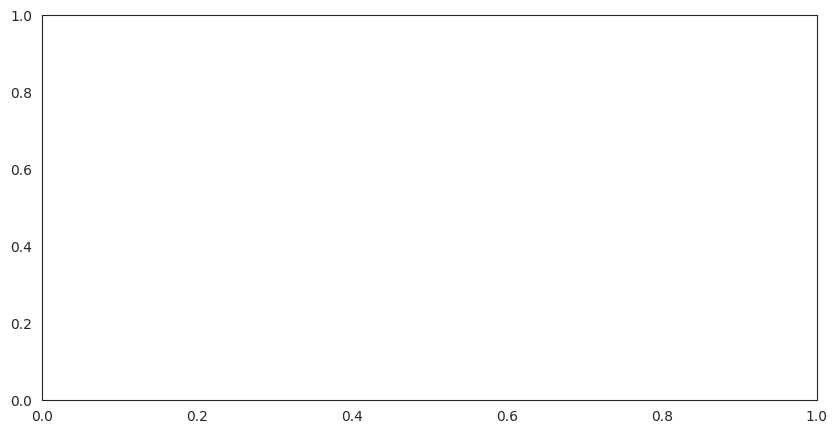

In [20]:
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Loop through the list of genes and plot their expression values
for gene in list_reg_TFs[0:10]:
    if gene in adata_lineage_meso.var_names:
        
        x_sorted = adata_lineage_meso.obs['Pseudotime_Lineage_Meso'].to_list()
        y_sorted = count_matrice[gene].to_list()
        
        # Interpolate to get a smooth curve
        spline = make_interp_spline(x_sorted, y_sorted, k=3)  # k is the degree of the spline
        x_smooth = np.linspace(x_sorted.min(), x_sorted.max(), 100)
        y_smooth = spline(x_smooth)
        
        plt.plot(x_smooth, y_smooth)
        # plt.plot(x_sorted, y_sorted)
#         plt.plot(adata_lineage_meso.obs['Pseudotime_Lineage_Meso'].to_list(), 
#                       count_matrice[gene].to_list())
    else:
        print(f"Gene {gene} is not in the dataset")

# Adding labels and title
ax.set_xlabel('pseudotime (DPT)')
ax.set_ylabel('gene expression (RNA)')
ax.set_title('Gene Expression along Pseudotime')
ax.legend()

# Show the plot
plt.show()

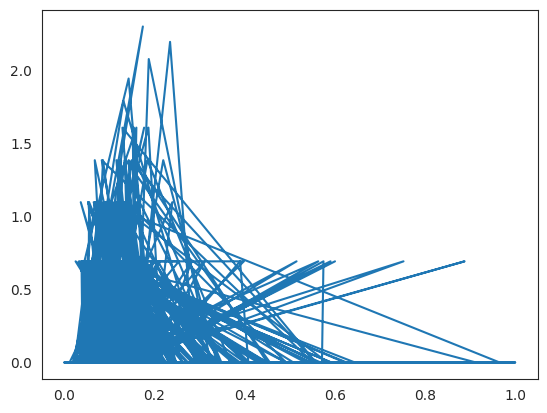

In [19]:
# gene_name
gene = "myf5"
x_sorted = adata_lineage_meso.obs['Pseudotime_Lineage_Meso'].to_list()
y_sorted = count_matrice[gene].to_list()

plt.plot(x_sorted, y_sorted)

In [ ]:
# pt = Pseudotime_calculator(oracle_object=oracle_TDR118)
# pt

In [ ]:
oracle_TDR118_simulated = co.load_hdf5("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/TDR118_cicero_output/13_TDR118_pseudotime_KOsimulated.celloracle.oracle")
oracle_TDR118_simulated

In [ ]:
oracle_TDR118_simulated.get_mcmc_cell_transition_table()